# Scraping For Data — A Practical Guide
A Python Notebook to accompany the article [Scraping For Data — A Practical Guide](https://medium.com/k-folds/scraping-for-data-a-practical-guide-67cc397450b2). 

Refer to [this guide](https://medium.com/k-folds/saving-without-gitting-downloading-from-github-without-using-git-72b90c694af4) for help downloading the notebook!


This guide is broken down into 3 main parts:
    1. Getting the text from a single page
    2. Getting the list of pages to iterate over
    3. Iterating over the list of pages to get every page's text
    
While the specific website you want to scrape may be different, if you can define your problem in terms of these steps, the process outlined below will help you scrape the data you need.   

For example, this guide will be working with Indeed.com, scraping job postings for a given job title. Each job is on a different page, and we have search results with 10 listings on each page. We need to:
    1. Find the text on each job posting
    2. Find the urls within each search result page
    3. Iterate through each page of search results to pull the 10 job postings on it. 
    
Sound similar to what you're trying to do? Let's get started!

## Part 1: Getting Text From A Job Posting

First, we need to make a connection to the web page we want to scrape.

In [1]:
from urllib.request import urlopen
#NOTE Python 2 users use this syntax 
#from urllib2 import urlopen

#connecting to a webpage
html = urlopen("https://www.indeed.com/viewjob?jk=d88f3bb95f1a4466")

print(html)

After connecting to the site, we can pull the raw code including all the page structure and printed text.

b'<!DOCTYPE html>\n<html lang="en">\n<head><title>Professional-Data Scientist-BIG DATA job - AT&amp;T - Plano, TX | Indeed.com</title>\n<meta name="description" content="April 7, 2017 - Professional-Data Scientist-BIG DATA - Overall Purpose: The Data Scientist will be responsible for designing and implementing processes and layouts for complex, large- scale data sets used" />\n<meta name="keywords" content="Professional-Data Scientist-BIG DATA job - AT&amp;T - Plano, TX" />\n<link rel="canonical" href="/job/Professional-Data-Scientist-Big-Data-at-AT&T-in-Plano,-TX-d88f3bb95f1a4466">\n<meta name="robots" content="NOINDEX"><link rel="alternate" media="handheld" href="/m/viewjob?jk=d88f3bb95f1a4466">\n<meta name="referrer" content="origin">\n<meta property="fb:app_id" content="115882278440564">\n<meta property="og:title" content="Professional-Data Scientist-BIG DATA job - AT&amp;T - Plano, TX">\n<meta property="og:site_name" content="Indeed.com">\n<meta property="og:image" content="http:/
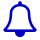
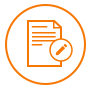
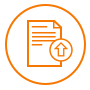
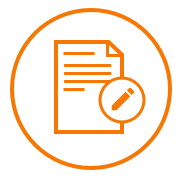
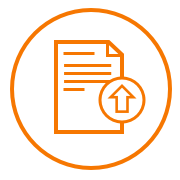

In [2]:
from bs4 import BeautifulSoup 

#Creating the python object to connect to the site
site = html.read()

print(site)

We can work with this text as is, but BeautifulSoup offers better functionality to make html parsing much easier. 
Let's create a BeautifulSoup object and see the differece.

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Professional-Data Scientist-BIG DATA job - AT&amp;T - Plano, TX | Indeed.com
  </title>
  <meta content="April 7, 2017 - Professional-Data Scientist-BIG DATA - Overall Purpose: The Data Scientist will be responsible for designing and implementing processes and layouts for complex, large- scale data sets used" name="description"/>
  <meta content="Professional-Data Scientist-BIG DATA job - AT&amp;T - Plano, TX" name="keywords"/>
  <link href="/job/Professional-Data-Scientist-Big-Data-at-AT&amp;T-in-Plano,-TX-d88f3bb95f1a4466" rel="canonical">
   <meta content="NOINDEX" name="robots">
    <link href="/m/viewjob?jk=d88f3bb95f1a4466" media="handheld" rel="alternate">
     <meta content="origin" name="referrer">
      <meta content="115882278440564" property="fb:app_id">
       <meta content="Professional-Data Scientist-BIG DATA job - AT&amp;T - Plano, TX" property="og:title">
        <meta content="Indeed.com" property="og:site_name">
 
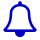
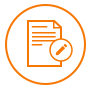
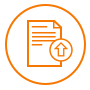
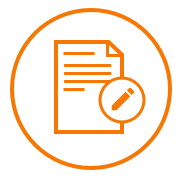
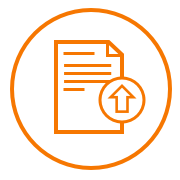

In [3]:
#Creating BeautifulSoup object to make parsing raw html easier
soup = BeautifulSoup(site, 'html.parser')

print(soup.prettify())

While visually cleaner, the text is also stored differently, being structured by the different tags contained within it.

To access different tags in the page, just call soup.tag_name

In [4]:
#This returns ONLY the first tag
print(soup.meta)

<meta content="April 7, 2017 - Professional-Data Scientist-BIG DATA - Overall Purpose: The Data Scientist will be responsible for designing and implementing processes and layouts for complex, large- scale data sets used" name="description"/>


We can save those tags as other python variables, or manipulate them within the BeautifulSoup object. Let's remove that tag from the object.

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Professional-Data Scientist-BIG DATA job - AT&amp;T - Plano, TX | Indeed.com
  </title>
  <meta content="Professional-Data Scientist-BIG DATA job - AT&amp;T - Plano, TX" name="keywords"/>
  <link href="/job/Professional-Data-Scientist-Big-Data-at-AT&amp;T-in-Plano,-TX-d88f3bb95f1a4466" rel="canonical">
   <meta content="NOINDEX" name="robots">
    <link href="/m/viewjob?jk=d88f3bb95f1a4466" media="handheld" rel="alternate">
     <meta content="origin" name="referrer">
      <meta content="115882278440564" property="fb:app_id">
       <meta content="Professional-Data Scientist-BIG DATA job - AT&amp;T - Plano, TX" property="og:title">
        <meta content="Indeed.com" property="og:site_name">
         <meta content="http://www.indeed.com/images/medium_logo.png" property="og:image">
          <script type="text/javascript">
           var tellFriendEmail = '';
          </script>
          <style type="text/css">
           .btn,.sg-b
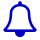
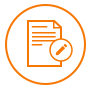
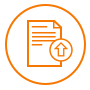
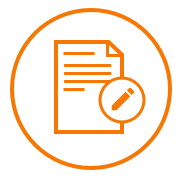
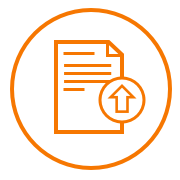

In [5]:
#Removing an individual tag from the BeautifulSoup object
soup.meta.decompose()

print(soup.prettify())    

The first meta tag on the page has been removed from our object. Since our goal is to scrape the printed text on the page, let's remove most of the formatting tags, since those only define page structure. Find_all() returns an array of matching tags, by calling it in this way, it removes every tag in the array from the object.

In [6]:
#removing all the formatting and meta tags from the object
for i in soup.find_all("script"):
    i.decompose()
for i in soup.find_all("style"):
    i.decompose()
for i in soup.find_all("noscript"):
    i.decompose()
for i in soup.find_all("div"):
    i.decompose()
for i in soup.find_all("meta"):
    i.decompose()
    
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Professional-Data Scientist-BIG DATA job - AT&amp;T - Plano, TX | Indeed.com
  </title>
  <link href="/job/Professional-Data-Scientist-Big-Data-at-AT&amp;T-in-Plano,-TX-d88f3bb95f1a4466" rel="canonical">
  </link>
 </head>
 <body class="ltr jasxcustomfonttst-inactive" data-tn-application="jasx" data-tn-olth="ffffea7078c5e62ac35ebeef761a3e30" data-tn-originlogid="1bghbj59nauls9p2" data-tn-originlogtype="viewjob" onload="onLoad();">
  <span id="hidden_colon" style="display:none">
   :
  </span>
  <table border="0" cellpadding="0" cellspacing="0" role="banner">
   <tr>
    <td width="1125">
     <table cellpadding="0" cellspacing="0" class="lnav">
      <tr>
       <td id="branding-td" style="vertical-align:top;">
        <a href="/" id="branding" onmousedown="ptk('logo');">
         
        </a>
       </td>
       <td style="padding-top:3px;" valign="top">
        <form action="/jobs" class="jsf" id="jobsearch" method="get" name="js

We've gotten rid of a lot of unwanted formatting text, but we can also remove the tags themselves. Calling get_text() removes the text within brackets and returns the text that is printed to the screen.

In [7]:
#getting only the text that would be visible on the webpage
text = soup.get_text()

print(text)



Professional-Data Scientist-BIG DATA job - AT&T - Plano, TX | Indeed.com








:







What
Where








 

 



 



job title, keywords or company


city, state, or zip













Overall Purpose: The Data Scientist will be responsible for designing
and implementing processes and layouts for complex, large- scale data
sets used for modeling, data mining, and research purposes.


Key
Roles and Responsibilities: This position will work closely with the IT,
Sales and Marketing organizations functional leads to formulate
hypothetical insights and work through the life cycle of delivering
these insights to production. Design and build large and complex data
sets, from spurious sources while thinking strategically about uses of
data and how data use interacts with data design. Design and implement
statistical data quality procedures around new data sources. Perform
data studies and data discovery around new data sources or new uses for
existing data sources. Implement any software 

This is better, but still difficult to work with. We can remove all the excess whitespace to make it more readable.

In [8]:
# breaking text into lines and removing excess whitespace
lines = [line.strip() for line in text.splitlines()]
lines = [l for l in lines if l != '']

for l in lines:
    print(l)

Professional-Data Scientist-BIG DATA job - AT&T - Plano, TX | Indeed.com
:
What
Where
job title, keywords or company
city, state, or zip
Overall Purpose: The Data Scientist will be responsible for designing
and implementing processes and layouts for complex, large- scale data
sets used for modeling, data mining, and research purposes.
Key
Roles and Responsibilities: This position will work closely with the IT,
Sales and Marketing organizations functional leads to formulate
hypothetical insights and work through the life cycle of delivering
these insights to production. Design and build large and complex data
sets, from spurious sources while thinking strategically about uses of
data and how data use interacts with data design. Design and implement
statistical data quality procedures around new data sources. Perform
data studies and data discovery around new data sources or new uses for
existing data sources. Implement any software required for accessing and
handling data appropriately.

To store it in a way that we can use it for data analysis, let's concatenate all the text onto one line, storing all the text as one long string.

In [9]:
#flattening onto one line
cleaned = ' '.join(lines)

print(cleaned)

Professional-Data Scientist-BIG DATA job - AT&T - Plano, TX | Indeed.com : What Where job title, keywords or company city, state, or zip Overall Purpose: The Data Scientist will be responsible for designing and implementing processes and layouts for complex, large- scale data sets used for modeling, data mining, and research purposes. Key Roles and Responsibilities: This position will work closely with the IT, Sales and Marketing organizations functional leads to formulate hypothetical insights and work through the life cycle of delivering these insights to production. Design and build large and complex data sets, from spurious sources while thinking strategically about uses of data and how data use interacts with data design. Design and implement statistical data quality procedures around new data sources. Perform data studies and data discovery around new data sources or new uses for existing data sources. Implement any software required for accessing and handling data appropriately.

Excellent! We've gotten all the text pertaining to the job description. To make this logic reusable, we can define a function to perform these steps for us. The function below takes a string as input corresponding to the job page's url and returns a string of the job description text.

In [10]:
#function to encapsulate logic above to connect to a page and pull the job posting
def get_text(url):
    html = urlopen(url)
    
    site = html.read()
    soup = BeautifulSoup(site, 'html.parser')
    for i in soup.find_all("script"):
        i.decompose()
    for i in soup.find_all("style"):
        i.decompose()
    for i in soup.find_all("noscript"):
        i.decompose()
    for i in soup.find_all("div"):
        i.decompose()
    for i in soup.find_all("meta"):
        i.decompose()
    text = soup.get_text()
    # break into lines
    lines = [line.strip() for line in text.splitlines()]
    lines = [l for l in lines if l != '']
    cleaned = ' '.join(lines)
    return(cleaned)

#testing to make sure it works
get_text("https://www.indeed.com/viewjob?jk=d88f3bb95f1a4466")

'Professional-Data Scientist-BIG DATA job - AT&T - Plano, TX | Indeed.com : What Where job title, keywords or company city, state, or zip Overall Purpose: The Data Scientist will be responsible for designing and implementing processes and layouts for complex, large- scale data sets used for modeling, data mining, and research purposes. Key Roles and Responsibilities: This position will work closely with the IT, Sales and Marketing organizations functional leads to formulate hypothetical insights and work through the life cycle of delivering these insights to production. Design and build large and complex data sets, from spurious sources while thinking strategically about uses of data and how data use interacts with data design. Design and implement statistical data quality procedures around new data sources. Perform data studies and data discovery around new data sources or new uses for existing data sources. Implement any software required for accessing and handling data appropriately

## Part 2: Finding Links To The Postings

Now that we know what to do with a single page, we need to find a way to access those pages within a search result page. To do this, let's look at the main search results and find the urls containing the job postings.

First, we need to connect to the webpage again.

In [11]:
url = 'https://www.indeed.com/jobs?q=data+scientist'
html = urlopen(url)
    
site = html.read()
soup = BeautifulSoup(site, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type">
   <!-- pll -->
   <script src="/s/175b0c0/en_US.js" type="text/javascript">
   </script>
   <link href="/s/bfd4a87/jobsearch_all.css" rel="stylesheet" type="text/css">
    <link href="http://rss.indeed.com/rss?q=data+scientist" rel="alternate" title="Data Scientist Jobs, Employment" type="application/rss+xml">
     <link href="/m/jobs?q=data+scientist" media="handheld" rel="alternate">
      <script type="text/javascript">
       if (typeof window['closureReadyCallbacks'] == 'undefined') {
        window['closureReadyCallbacks'] = [];
    }

    function call_when_jsall_loaded(cb) {
        if (window['closureReady']) {
            cb();
        } else {
            window['closureReadyCallbacks'].push(cb);
        }
    }
      </script>
      <script src="/s/a03ecb0/jobsearch-all-compiled.js" type="text/javascript">
      </script>
      <script type="text/javascript">
     

While there is a lot of text on the page, we only want the job listings, which if you look at the website, is contained within the middle of the page. Let's pull that tag to get it. 

It's contained within a < td > tag, but there are a lot of those. To make sure we get the right one, we can filter down to the the tag that contains the id 'resultsCol', since that id will be unique to one tag.

In [12]:
# accessing the results section of the page
results = soup.find(id = 'resultsCol')

print(results)

<td id="resultsCol">
<div class="messageContainer">
<script type="text/javascript">
function setJaPromoCookie() {
var expires = new Date();
expires.setTime(expires.getTime() + (5 * 365 * 24 * 60 * 60 * 1000));
setCookie("showJaPromo", "1", expires);
}
function setRefineByCookie(refineByTypes) {
var expires = new Date();
expires.setTime(expires.getTime() + (10 * 1000));
for (var i = 0; i < refineByTypes.length; i++) {
setCookie(refineByTypes[i], "1", expires);
}
}
</script>
<p class="message">Tip: Enter your zip code in the "where" box to show results in your area.</p>
</div>
<style type="text/css">
#increased_radius_result {
font-size: 16px;
font-style: italic;
}
#original_radius_result{
font-size: 13px;
font-style: italic;
color: #666666;
}
</style>
<div class="resultsTop"><div id="searchCount">Jobs 1 to 10 of 23,738</div>
<div data-tn-section="primePromo" id="primePromo">
<span class="new">New!</span> <a href="/promo/prime" onclick="this.href = appendParamsOnce( this.href, '?from=ser

We know urls are contained within < a > tags, so lets find all the urls contained within that section.

In [13]:
# getting an array of all the urls contained within the results
print(results.find_all('a'))

[<a href="/promo/prime" onclick="this.href = appendParamsOnce( this.href, '?from=serptop&amp;subfrom=primeprmtop&amp;trk.origin=jobsearch&amp;trk.variant=primeprmtop&amp;trk.tk=1bghbk6u0aha18eb&amp;vertical=TECH&amp;x_isid=serptop&amp;x_ikw=data+scientist&amp;x_sid=serptop&amp;x_kw=data+scientist')">Join Indeed Prime</a>, <a id="jobPostingsAnchor" tabindex="-1"></a>, <a class="jobtitle turnstileLink" data-tn-element="jobTitle" href="/pagead/clk?mo=r&amp;ad=-6NYlbfkN0AaBseF7-iEzmZaj13NDjQ8DVLTYLLr5rWD7DaOkjm4RKw1T97d0M2gBvmW5rVnUtnLqEaB_yQFTkFq-__e-IC3Bsk0_DNKwWNZHsmN7eyRW4n6bu2r4LIoQpgAIK5eUnUaaHBlw0ZMJSUonLIwL4vlD3RKYuomE4Qm70Xj8zF0nNNfwpY_KYwb6_d4jwFyogyhREbL4C8O7lSrR0a95uVJ1QU-kst_o5bZbeUa580j9Oeyhl7WbkS8oki09NbPJxZpFI_8TocvlVVO3jimm4rN_CwuHHw4dRrztApdeRO1Y0SZKpWvyXQ0Lq4oOn0iZsguZtVd-I8TsCgI63yEQEf-VNj3oKwNbmIzTCfyX_Evs2IRKzVP4Qcrb3ChoduSn65z651-hP42xVBL6gsSrbTqo6YBl3rtQxHXv2qghkf7jem4Q0wH4FbsKg-zT3qR11obp6wveHSQD3HJZnl_q-cp&amp;p=1&amp;sk=&amp;fvj=1" id="sja1" onclick="setRefineByC

This gives us the complete tag, but a lot of that contains formatting and structural information. To get the text pertaining to the url, we can filter it down to only keep the part of the tag following the 'href'.

In [14]:
#cleaning it up to only urls
page_urls = [link.get('href') for link in results.find_all('a')]

print(page_urls)

['/promo/prime', None, '/pagead/clk?mo=r&ad=-6NYlbfkN0AaBseF7-iEzmZaj13NDjQ8DVLTYLLr5rWD7DaOkjm4RKw1T97d0M2gBvmW5rVnUtnLqEaB_yQFTkFq-__e-IC3Bsk0_DNKwWNZHsmN7eyRW4n6bu2r4LIoQpgAIK5eUnUaaHBlw0ZMJSUonLIwL4vlD3RKYuomE4Qm70Xj8zF0nNNfwpY_KYwb6_d4jwFyogyhREbL4C8O7lSrR0a95uVJ1QU-kst_o5bZbeUa580j9Oeyhl7WbkS8oki09NbPJxZpFI_8TocvlVVO3jimm4rN_CwuHHw4dRrztApdeRO1Y0SZKpWvyXQ0Lq4oOn0iZsguZtVd-I8TsCgI63yEQEf-VNj3oKwNbmIzTCfyX_Evs2IRKzVP4Qcrb3ChoduSn65z651-hP42xVBL6gsSrbTqo6YBl3rtQxHXv2qghkf7jem4Q0wH4FbsKg-zT3qR11obp6wveHSQD3HJZnl_q-cp&p=1&sk=&fvj=1', '#', '/pagead/clk?mo=r&ad=-6NYlbfkN0CyGGNFtAqUzdQVhgxgKtB61tSC0SR3x5ErmQ9dbBAY2d5_xJ8-F8RUIaCqFosVCxWVOfxpLG7sDUpgKkQcS9ZxtacMnwE1wieZpJZOjke7XGMKuzoc7hKtN62ROrHSPkumZ8GlDvtMrtz91ew9shNQNN-e6g8EQdGM4nvRvaQFhXeXKzQm8BrFQxKr9Y0_q86qevEpQBo1F3xsi9RGdGq3HK8kWaLjrt9pkek__lZ8zmrv3QonwzOAtzBFhT_2ym4hYuoSNGxp6M4p8UZRwiXTgIadKeAROOBGUinSA5DWb8CgSn8KeKKnxvxs1L6pQWgTd27iPtupz-ELT2cRfyHE3LJ5Rld4rCTC6tQN7UTHyK_m3F86p_TVdTDNPR8Y0VqjAToz7d_Yqw==&p=2&sk=&fvj=0', '/cmp/In

Given that there are only 10 job listings on the page, a lot of these must be for other links. 

Which ones contain the job listings? If you examine the page closely, the urls with 'rc' in them are the ones we want. Let's only keep those.

In [15]:
#keeping only strings that contain '/rc/'
page_urls = [link for link in page_urls if '/rc/' in str(link)]

print(page_urls)

['/rc/clk?jk=cac79c32392dd0f5&fccid=28dd3b780624bbf1', '/rc/clk?jk=90504f2af200417f&fccid=7aa4bd6599255519', '/rc/clk?jk=77f95ec7de528a18&fccid=c46d0116f6e69eae', '/rc/clk?jk=08cde559c2bfc87c&fccid=b44f3724fccedbe7', '/rc/clk?jk=227d0c4b78bf375a&fccid=de71a49b535e21cb', '/rc/clk?jk=0b6145582cbde630&fccid=fe2d21eef233e94a', '/rc/clk?jk=453bf49d191b6233&fccid=1639254ea84748b5', '/rc/clk?jk=eb49fe37e53a2511&fccid=4e041af1d0af1bc8', '/rc/clk?jk=1417578f56314052&fccid=1a6c05c38b3b5549']


If we use some of these urls as they are, they may redirect to the company's posting instead of staying on Indeed.com. We won't be able to use our function above if this happens, so we need to pull the job id from the url. We can use that to create our own custom url that will stay on Indeed.com. 

Let's pull the ids by finding the locations in the string where the jk variable is defined.

In [16]:
#array to store job ids
ids = []
for link in page_urls:
    #finding locations in the string to start and stop
    start = link.find('jk=') + 3
    end = link.find('&fccid=')
    
    #appending id to the array
    ids.append(link[start:end])
    
print(ids)

['cac79c32392dd0f5', '90504f2af200417f', '77f95ec7de528a18', '08cde559c2bfc87c', '227d0c4b78bf375a', '0b6145582cbde630', '453bf49d191b6233', 'eb49fe37e53a2511', '1417578f56314052']


That's all we need to get the job postings from a page of seach results! Let's encapsulate this into a function as well. The function below takes a url pertaining to a url for a job results page and returns an array of 10 job ids.

In [17]:
#combining logic above to return the job postings from a single page
def get_links(url):
    html = urlopen(url)
    
    site = html.read()
    soup = BeautifulSoup(site, 'html.parser')
    results = soup.find(id = 'resultsCol')
    page_urls = [link.get('href') for link in results.find_all('a')]
    page_urls = [link for link in page_urls if '/rc/' in str(link)]

    
    ids = []
    for link in page_urls:
        start = link.find('jk=') + 3
        end = link.find('&fccid=')
        ids.append(link[start:end])
    return(ids)

get_links('https://www.indeed.com/jobs?q=data+scientist')


['cac79c32392dd0f5',
 '90504f2af200417f',
 '77f95ec7de528a18',
 '08cde559c2bfc87c',
 '355cfbc4972ad94f',
 '0b6145582cbde630',
 '453bf49d191b6233',
 'eb49fe37e53a2511',
 '1417578f56314052']

## Part 3: Working With All The Postings

We've got what we need for a single page, and we know how to get the data on a search results page. All that's left is to tie them together! 

First, we need to determine how many pages we need to iterate over. So let's go back to the first results page.

In [18]:
url = 'https://www.indeed.com/jobs?q=data+scientist'
html = urlopen(url)
site = html.read()
soup = BeautifulSoup(site, 'html.parser')
results = soup.find(id = 'resultsCol')

print(results)

<td id="resultsCol">
<div class="messageContainer">
<script type="text/javascript">
function setJaPromoCookie() {
var expires = new Date();
expires.setTime(expires.getTime() + (5 * 365 * 24 * 60 * 60 * 1000));
setCookie("showJaPromo", "1", expires);
}
function setRefineByCookie(refineByTypes) {
var expires = new Date();
expires.setTime(expires.getTime() + (10 * 1000));
for (var i = 0; i < refineByTypes.length; i++) {
setCookie(refineByTypes[i], "1", expires);
}
}
</script>
<p class="message">Tip: Enter your zip code in the "where" box to show results in your area.</p>
</div>
<style type="text/css">
#increased_radius_result {
font-size: 16px;
font-style: italic;
}
#original_radius_result{
font-size: 13px;
font-style: italic;
color: #666666;
}
</style>
<div class="resultsTop"><div id="searchCount">Jobs 1 to 10 of 23,781</div>
<div data-tn-section="primePromo" id="primePromo">
<span class="new">New!</span> <a href="/promo/prime" onclick="this.href = appendParamsOnce( this.href, '?from=ser

We need to get the total job count by grabbing that text "Jobs 1 to 10 of ...". 

It's in a < div > tag with the id "searchCount", so we can find it by using that unique id.

In [19]:
#grabbing the id tag for the search count
count_string = soup.find(id = 'searchCount')

print(count_string)

<div id="searchCount">Jobs 1 to 10 of 23,781</div>


Now we just need to take that string and trim it down to the count number.

In [20]:
#getting just the text in the string
count_string = count_string.get_text()
#spitting the string by white spaces and keeping only the last value
count = count_string.split(' ')[-1]
#removing the punctuation
count = count.replace(',', '')
#converting to a number
count = int(count)

print(count)

23781


Now that we know how many jobs we need to scrape, we can start iterating over the search results!

To get a feel for how this is going to work, let's test it on the first 20 jobs. Create a url pertaining to the search results page then grab the ids on the page. Once one page is done, we increment to the next page to grab the next 10 results. 

To make sure we're not being disruptive when we do this on all the results, we should also pause a second after grabbing a page's results.

In [21]:
from time import sleep 

i = 0
job_ids = []
while i < 20:
    #creating custom search url for the correct page of results
    url = 'https://www.indeed.com/jobs?q=data+scientist&start=' + str(i)
    #calling function to grab ids and adding to the array
    job_ids = job_ids + get_links(url)
    #pausing for a second so we don't overload their server
    sleep(1)
    #updating to get to the next page
    i = i + 10    
    
print(job_ids)

['cac79c32392dd0f5', '90504f2af200417f', '77f95ec7de528a18', '08cde559c2bfc87c', '355cfbc4972ad94f', '453bf49d191b6233', '0b6145582cbde630', 'eb49fe37e53a2511', '1417578f56314052', 'd6349a90889073c7', '666c05c6a631a490', '76db1c18c682e4ef', '95c774ff3e2044ac', 'd587e656121f54cc', '7a1fff35dc27efc6', 'bdffce0cde4efa6f', '91ce02aef7890256', '7e71e8b39d305d92']


Since that's working, we can now grab the text for each of those ids. Iterate over the array, creating a url for each id and grabbing the text for it, saving the results in another array.

In [22]:
descriptions = []

for id in job_ids:
    #generating custom job url
    url = "https://www.indeed.com/viewjob?jk=" + str(id)
    #appending to the end of the array
    descriptions.append(get_text(url))
    #pausing for a second so we don't overload their server
    sleep(1)
    
print(descriptions)

['Data Scientist job - Eventbrite - Nashville, TN | Indeed.com : What Where job title, keywords or company city, state, or zip THE CHALLENGE The Analytics & Data Science team works day-in and day-out to solve complex problems, build innovative models and support data-informed decision making and transparency at Eventbrite. We are committed to dedicating the same intensity to our organizers, helping them to drive their business’ forward with insightful data and analytics. As Eventbrite continues to grow, the types of questions we ask and the data we look at also grows, requiring us to work better and smarter. We are an expanding marketplace where understanding the relationship between supply and demand is the essence of what we do. Our team of creative self-starters has no problem tackling unstructured problems with a lot of independence and clearly articulating our insights to the business to drive impact. THE TEAM The business decisions we make as our product grows and evolves are gui

Now that the separate pieces are working, we can finish up by combining everything into a single function. 

The function below takes a main search results page as input, grabs all the posting ids from the results, then pulls the text from each posting, storing the results in an array. 

Just feed it your main url, then sit back and wait for your data!

In [25]:
def get_job_descriptions(search_url):
    html = urlopen(search_url)
    site = html.read()
    soup = BeautifulSoup(site, 'html.parser')
    results = soup.find(id = 'resultsCol')

    divs = results.find_all('div')
    for x in divs:
        if x.get('id') == 'searchCount':
            count_string = x

        
    #getting just the text in the string
    count_string = count_string.get_text()
    #spitting the string by white spaces and keeping only the last value
    count = count_string.split(' ')[-1]
    #removing the punctuation
    count = count.replace(',', '')
    #converting to a number
    count = int(count)
    
    print("Getting job ids...")

    i = 0
    job_ids = []
    while i < count:
        #creating custom search url for the correct page of results
        url = search_url + '&start=' + str(i)
        #calling function to grab ids and adding to the array
        job_ids = job_ids + get_links(url)
        #pausing for a second so we don't overload their server
        sleep(1)
        #updating to get to the next page
        i = i + 10

    print("Finished pulling job ids. Getting descriptions...")
    
    descriptions = []
    
    #creating a counter to keep track of progress
    iteration_counter = 0
    for id in job_ids:
        #Printing out progress if we are on a tenth job id
        if iteration_counter % 10 == 0:
            print("Grabbing job " + str(iteration_counter))
        iteration_counter = iteration_counter + 1
        
        #generating custom job url
        url = "https://www.indeed.com/viewjob?jk=" + str(id)
        #appending to the end of the array
        descriptions.append(get_text(url))
        #pausing for a second so we don't overload their server
        sleep(1)
    
    return(descriptions)

In [26]:
#This will take a while!
job_descriptions = get_job_descriptions('https://www.indeed.com/jobs?q=data+scientist')

#looking at a few of the results
print(job_descriptions[40:50])

Getting job ids...
Finished pulling job ids. Getting descriptions...
Grabbing job 0
Grabbing job 10
Grabbing job 20
Grabbing job 30
Grabbing job 40
Grabbing job 50
Grabbing job 60
Grabbing job 70
Grabbing job 80
Grabbing job 90
Grabbing job 100
Grabbing job 110
Grabbing job 120
Grabbing job 130
Grabbing job 140
Grabbing job 150
Grabbing job 160
Grabbing job 170
Grabbing job 180
Grabbing job 190
Grabbing job 200
Grabbing job 210
Grabbing job 220
Grabbing job 230
Grabbing job 240
Grabbing job 250
Grabbing job 260
Grabbing job 270
Grabbing job 280
Grabbing job 290
Grabbing job 300
Grabbing job 310
Grabbing job 320
Grabbing job 330
Grabbing job 340
Grabbing job 350
Grabbing job 360
Grabbing job 370
Grabbing job 380
Grabbing job 390
Grabbing job 400
Grabbing job 410
Grabbing job 420
Grabbing job 430
Grabbing job 440
Grabbing job 450
Grabbing job 460
Grabbing job 470
Grabbing job 480
Grabbing job 490
Grabbing job 500
Grabbing job 510
Grabbing job 520
Grabbing job 530
Grabbing job 540
Grabbin

In [27]:
#saving results to a text file to reopen later if desired
f = open("job_descriptions.txt", "w")

for i in job_descriptions:
    f.write(str(i)+'\n')
    
#f.write("\n".join(map(lambda x: str(x), job_descriptions)))
f.close()